In [1]:
import pandas as pd

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns 

sns.set(color_codes = True)

%matplotlib inline

import plotly.graph_objects as go

from plotly.subplots import make_subplots

from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from textblob import Word

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, KFold

from textblob import TextBlob

import gender_guesser.detector as gender

import nltk

from nltk.corpus import stopwords

import re

import emoji

from scipy.stats import chi2_contingency

from matplotlib.patches import ConnectionPatch


In [2]:
dictionary = {}

male = ['Marcelo', 'Rodrigo', 'Marcos', 'Rafael', 'Paulo', 'Anderson',
       'Fernando', 'Luiz','Felipe', 'Eduardo', 'Ricardo', 'José', 'Diego', 'Daniel', 'Guilherme', 
                 'Marcio', 'Tiago', 'Sergio', 'Leandro', 'Alex', 'Lucas', 'Thiago', 'Carlos', 
                 'Danilo', 'Pedro',  'Henrique', 'Luciano', 'Alexandre','Jose', 'Matheus',
                 'João', 'Bruno', 'Gustavo', 'Andre', 
                'Mauricio', 'Jorge', 'Vinicius', 'Vitor', 'Roberto',
       'Joao', 'Gilberto', 'Rogerio', 'Diogo',
       'Alan', 'Reinaldo', 'Renato', 'Douglas',
       'Claudio', 'Junior', 'Flavio', 'Leonardo', 'Adriano', 'Antonio',
                'Francisco', 'Gabriel', 'Wellington', 'Edson', 'Arthur', 'Denis', 'Luan',
                'paulo', 'David', 'carlos', 'Jefferson', 'jorge', 'Everton',
                'Ivan', 'Gil', 'Luis', 'Cristiano', 'Ailton', 'André', 'Robson', 
               'Kleber', 'Vanderlei', 'Adilson', 'Fábio', 'Kevin', 'Emerson', 'Marco', 'Mario',
               'Sidnei', 'Nilton', 'Rubens', 'nilson', 'DANIEL', 'Pablo','Márcio', 'Mateus', 'Roger',
                'Cicero', 'Samuel', 'Peterson', 'junior', 'Josue', 'Alessandro',
                'Dorival', 'eduardo', 'Humberto', 'Reginaldo', 'Mark', 'Anselmo', 'Juliano',
                'Elias', 'leandro', 'Yvan', 'antonio', 'Cleiton', 'Wilson', 'Cesar','Dimas', 'Washington',
                 'Moises', 'Silvio', 'Igor', 'Clayton', 'Sandro', 'Filipe', 'MARCOS',
                'Celso', 'Raul', 'Milo', 'Demetrius', 'Adailton', 'sandro', 'Manuel','William', 
                'sergio', 'Chiko', 'Flávio', 'alvarobaptista', 'Angelo', 'Joilson',
                'Giovane', 'Eneas', 'Serginho', 'Michel', 'Jacinto', 'Osmilton', 'Valdir', 
                'Magno', 'ALEXANDRE', 'Cleikson', 'HENRIQUE', 'JEAN', 'Fabiano',  'diego', 'Thomaz',
               'Yuji', 'andre', 'Dirceu', 'Wiliam', 'Giulian',
       'Oriomar', 'Renan', 'Fabrizio', 'Salvador', 'Wiliam',
       'Humana', 'Giulian', 'Walkiria', 'Nayon', 'Naiana', 'claudinei',
       'Yoshio', 'Victor', 'Edenilson', 'alan', 'Josafath',
       'Rivelino', 'Evaldo', 'Gercy', 'Giulliano', 'Marcony', 'Moisés', 'Elvio', 'Elson',
                'Juraci', 'Max', 'Robison', 'Claudemiro', 'SAMUKA', 'Jclaudio.',
                'Alecsandro', 'Gui', 'pedro', 'Alisson', 'Fabrício', 'ADOLFO',
                'Cássio', 'Zeca', 'Raimundo', 'Sebastião', 'ricardo',
       'Venildo', 'Celio', 'Ed', 'Gilmar', 'Jander', 'claudio', 'Reynaldo', 'arthur', 
                'josé', 'Denilson', 'Nelito', 'Charles', 'Valdeir', 'Arquimedes', 
                'Welinton', 'Marcello', 'martilho', 'Erik', 'renato', 'Vladimir', 'Guiarony', 'Osmair', 
       'Fernandinho', 'Cleyton','ISRAEL', 'ulisses', 'Aloisio', 'EMERSON', 'Éslei', 'Mano', 'robson',
       'Ivaldo', 'orlando', 'Ben', 'valmir',  'James', 'victor', 'Tales', 'denis', 'Mikéyas','marcelo', 
       'Wilton', 'Hiroki', 'Everson', 'Sidinei', 'Cleber', 'nivaldo', 'Higor',
       'Sândalo', 'marcio', 'Jhon', 'Ireldo', 'Gilson', 'cleiton', 'Marcus', 'claudenir',
       'JOSE', 'Alefe','sandrino', 'Leo', 'Giovani', 'Marconne',  'MUCIO', 'Wesley', 'rodney', 'alexandre',
       'Tom', 'Acácio', 'Marcao', 'Jonathan', 'Leonard','Almir', 'Moacir',
       'Hércules', 'Henry',  'Agnaldo','Christian', 'JeanZin', 'Claudinei', 'Milton', 'Andreas',  'Ademir', 
       'jose','Rubinho', 'Zé','Amaury' , 'Cláudio', 'Edevaldo','Claus', 'Kaique',  'Natan','Deivid',
       'Waldemir', 'Cleison',  'Arthursousa', 'EVANDERSON', 'Richard', 'Matias', 'PABLO', 'edison',
        'Aldemir','Edesio','JAMES', 'Wyctor', 
'ALLAN', 'Fred', 'Walter', 'Heitor', 'Isaias', 'rinaldo', 'julio',
'Cristhian', 'Ronald', 'Felipy', 'Adagilzon', 'rogerio', 'Tharles', 'izaquiel', 'Edvan',
'edson', 'Djalma','Alberto', 'sirLuis', 'mauricio','samuel','Rodolfo',
'Edmilson', 'Josenildo','Felippe', 'Sérgio', 'Ulisses', 'erico','wellington', 'emerson','Rafaelo','Jeanlucca',
        'Artur', 'Sidney', 'Emanuel','Jeferson', 'Lidio',  'Ivo', 'Clovis', 'Vinícius',
'Alexsandro', 'Luizinho',  'ednardo', 'josiel', 'helcio', 'Décio', 'ronaldo', 'Manoel', 'emidio', 
         'RICARDO', 'Enzo', 'Benedito', 'Jura', 'Léo', 'wagnerwja', 'mariolucio', 'ALEX', 'Ronaldo',
'Maicon', 'Thayron', 'Murillo', 'Gerson','tiaguinho', 'kayo', 'Marcola', 'GustavoTBR',
'Jairo', 'fabio', 'Jael', 'Everaldo', 'Elenildo','Brunojoaquim', 'Jomar',  'henrique',  'Jovani',
 'Cleberson', 'Murilo',   'Elcio', 'Raildo', 'william','Mauro', 'Heber',
 'Eliseu', 'Guto', 'wagner', 'IGOR', 'Rogério', 'Ralph','Feliks', 'willian',
'Eder', 'bruno', 'César', 'Jaime', 'Will', 'Waldires',  'gustavao0103'
'francisco', 'Fael', 'Josecarlos']


female = ['Ana', 'Maria', 'Fernanda', 'Patricia', 'Simone', 'Vanessa', 'Sandra',
                'Daniela', 'Adriana', 'Juliana', 'Bruna', 'Renata', 'Elaine', 'Bianca',
       'Cristiane', 'Eliana', 'Luciana', 'Katia', 'Leticia', 'Aline', 'Paula', 'Angela', 
                 'Lilian', 'Michele', 'Thais', 'Cristina', 'Jaqueline', 'Naiana', 
                'Rose', 'Eliane', 'Erika', 'Amanda', 'Fabiana', 'Andreia', 'Marcia',
                'Vera', 'Alexandra', 'Marta', 'Ane', 'Priscila', 'Antonieta', 'sandra',
       'rosangela', 'Larissa', 'Valeria','Luana', 'Natalia', 'Mariana', 'Regina', 
               'Monica', 'Evelyn', 'Beatriz', 'Rosemeire', 'Roniele', 'Lia', 'Karem',
       'Carolina', 'Alessandra', 'Suelen', 'Sheila', 'Walkiria', 'AnaLucia', 'Sol', 
       'Milena', 'Rosana', 'Tania', 'silvana', 'Rosa', 'Sarah', 'Barbara', 
               'Rosangela', 'Kelly',  'Daisy', 'vanessa', 'Gislene', 'Marijara', 'Ayra',
       'Andrea', 'Débora', 'Vitória', 'Gabriela', 'CARLA', 'Andreza', 'Jandira', 'Laura', 
               'Letícia', 'Gislaine', 'Selma', 'Vivian', 'Michelle', 'Silvia', 'ana', 'Dayana', 
                 'Priscilla', 'Andressa', 'Edna', 'Debora',  'Lucia', 'Neuza',
       'Cecilia', 'Jenifer', 'Ivone','Ernani', 'Samantha', 'Keity', 'Vilma',
               'Joice', 'Vanda', 'Cláudia', 'Christiane',  'Samira', 'Márcia', 'Denise', 'Cibele',
                'Lucilene', 'Carla', 'Rebeca', 'Elizabeth', 'Bia',
               'Caroline', 'Dani', 'Mayara', 'Giovanna', 'Karla', 'Danielle', 'Camila', 'Gabi',
                'Abigail', 'Viviane','Marilda', 'Joslaine', 'jardiane', 'Marilene',
       'Elis', 'Katy', 'Mayelen', 'Helen', 'TALITA', 'Hellen', 'cristiane', 'Thamires', 
                'daniela', 'Magda', 'Jackeline', 'Anahy', 'Cintia', 'Taty', 'Cássia', 'sibele',
                'Pri', 'Danielly', 'Antonia', 'Zilma', 'JULIANA', 'Bárbara', 'Cleidiane', 'Jailma', 
                'maria', 'Kᴇʟʟʏ.', 'Ester', 'Roseley', 'Andréa', 'Jennifer', 'Juleine',
                'Phaola', 'marcelina', 'Iara', 'claudia', 'leodora', 'Tamires', 'graziela',
                'Roberta','Joyce', 'ANA', 'Josely',  'julianna', 'Raniery', 'Martha', 'Nicola',
         'Mary', 'Sonia', 'Lisandra', 'Laís', 'Elza', 'Paty', 'Virginia', 'Aneliza', 'Thayna', 'Luh',
        'Nair', 'Ariane', 'Desyrré', 'Jessilin', 'Angelina', 'Charlenne', 'Susan', 'DAIANNE',
         'Maribel', 'Roseli', 'Fátima', 'Elisete','Keila', 'Viviani', 'Gessica', 'Maiara', 'Kalianna',
         'SARA', 'Milla', 'Erica', 'Clayde', 'paula', 'lia', 'Irene', 'Daniele', 'Daiani',
         'Jessica', 'Lucielma', 'josy', 'Ágata', 'vilma', 'Nazinha', 'Rayssa', 'Juliane', 'Marili',
         'patricia', 'Su', 'Josirlei',  'Tamar', 'Lucineia', 'Mislene', 'gabi','Betty','Thianne',
        'Ellen', 'Cleide', 'Clarice', 'Analia', 'Karen', 'Suh', 'Saahh', 'Angélica',
         'Kátia', 'Ligia', 'michele', 'Claudineia', 'Estefane', 'fabiola', 'sonia',
       'Ariele', 'Anita', 'Katiuscia',  'eleni', 'Elizandra', 'Safira', 'Tanyse', 
          'Rosely', 'Elisabeth', 'Sueli',  'Janaina', 'Jéssica', 'Joelma', 'Julia',
          'Suellen', 'Rosimeyre', 'Rosecléia', 'Elisandra',  'Nádia', 'jussara', 'elisangela',
         'isabel',  'Shirley', 'Steff',  'Bel', 'Sabrina',
         'nica', 'Fabiola',   'Khethulley',  'dilma',  'Marcella', 'Tamiris', 
         'Denilda', 'Cleuza', 'Mirella', 'Suely', 'Leila', 'Celia',  'Tatiana', 'Margareth', 'Silvana',
'Marlene', 'Michely', 'Cátia', 'Thays',
         'Lindineide',  'Thainara', 'Camile', 'Andreildes', 'Tânia',   'IVONETE',
         'Elliethy',  'Zilda', 'rejane',  'Giselle', 'Solange', 'Dreicy',   'Cleovania', 'Bruna,',
         'Andrielle', 'Fran', 'Ines',  'Soraya', 'Ivanilda', 'nadir', 
 'Dai', 'Roseneti','Ivete', 'Rene', 'Helena',
'sabrina',  'Duda', 'Marcele',  'Nicole','Grazielle','Jéssika',  'Jayza','Raquel', 'Conceição', 
         'Elisangela', 'SUELI', 'Jorlanda', 'Ketury', 
 'Maryah', 'Jeniffer', 'monalisa','Luciane', 'Stefanya', 'Heloisa', 'Zenilce',
'Nathalia',  'Lari',  'Milene',  'Jussara', 'Neurimar', 'JaqueGS2', 'amanda',
'Rosemary', 'Li', 'nice', 'Gabriella','Keli',  'Marcela',  'Heloísa',
 'Zazá', 'Rafaella', 'Eunice', 'priscila', 'Rita',  'Elizabete', 'Tatiane',
'Miriam',  'Lorena',   'Joara','Queila','Michela', 'Neide',
 'Liliana', 'Pamela', 'Tayná', 
'josibele',    'Deise', 'Cinthia',  'Iris', 'Anali', 'Nalva', 
'Aparecida', 'Ari', 'Itala', 'Vivi', 'fernanda', 'Francielle', 'Iane', 'Gisele', 'Fabíola', 
          'Nilse', 'marcela','Tere', 'Genoveva', 'Laura.mantia']

unknown = [ 'Prof.',  'J', 'DeH', 'WRS', 'Cheiro',
                'doutor', 'Andy', 'G.L', 'Dione', 'Rudi', 'Humana',
                'Nayon', 'Ribeiro', 'Floripes', 'CRITICAL',
       'Sensei', 'Assis',  'Ribs', 'Mendes', 'Pr.Pierre', 'Pamoreninha',
                'Leme', 'SEX', 'jubs', 'Sherlon', 'Ianne', 'M.9', 'Canal',
                'Lefagon', 'REGUEZA', 'Alves', 'Acampando', 'skank566', 'novo', 'Favero', 
          'Sorae', 'Re2014', 'Ferry', 'REMAX', 'Laleska', 'arimatel', 'RR', 'viajeagoracomigo',
          'Rovessa', 'Ulrich', 'Fiat', 'megbkubo', 'Thebaskoo', 'Magaiver', 'Vigia',
          'Fatinanzi',  'H', 'Herdine', 'SIMIONATO', "Mircas001's", 'Oede', 'kellybellon',
       'Galdino', 'Dr.', 'Noedirf', 'FAMÍLIA', 'ARROW', 'Altairjoao', '#chji',
          'Jan', 'APBL', 'Rubaiyat', 'silvia','Taike', 'Anayan',  'F', 'Animaker', 'Salatir', 'Edi',
           'Família','SHIRÁ','Juart', 'O', 'Stam', 'Motofaturca','Orlandini','Volei', 'VIVENDO', '·','Martin', 
           'Thairony', 'Arquiteto',  'E', 'POLACKA','Psicóloga', 'Izah','Sem',
'Personal', 'Aventura','Pezão77','Cheirinho', 'Dan',
'HotRed','Feul', 'Sushine', 'Kielblock',  'Luck', 'Eu', 'Arthdrone', 'Chandra',
          'Rawesller','MONY2020','Crist', 'Fuji', 'Yco',  'Kombi', 'ANICETO','Micha_ex','Aldeia',
'Cozinha', 'Pai','Iam','Dilca', 'Wangri','BARBOSA','Deley','Donadelli','amor',
'Limão', 'grecco','Dorta','Estética',] 

business = ['Auto','MOTORLIFE', 'body-guard', 'SMTPRINTER', 'Studio',
                'DCriartes', 'Games', 'Crossover', 'Idiarte', 'ICM', 'Mexida_parts',
           'Turismo', 'INTERPLACE', 'Centro'] 

In [3]:
# Assign genders
for name in male:
    dictionary[name] = "male"

for name in female:
    dictionary[name] = "female"

for name in unknown:
    dictionary[name] = "unknown"
    
for name in business:
    dictionary[name] = "business"

In [4]:
import pandas as pd

# Convert dictionary to list of tuples
name_gender_list = [(name, gender) for name, gender in dictionary.items()]

# Create DataFrame
name_gender_df = pd.DataFrame(name_gender_list, columns=['Name', 'Gender'])

# Display DataFrame
print(name_gender_df.head())


      Name Gender
0  Marcelo   male
1  Rodrigo   male
2   Marcos   male
3   Rafael   male
4    Paulo   male


In [5]:
name_gender_df.head(20)

,Name,Gender
0,Marcelo,male
1,Rodrigo,male
2,Marcos,male
3,Rafael,male
4,Paulo,male
5,Anderson,male
6,Fernando,male
7,Luiz,male
8,Felipe,male
9,Eduardo,male


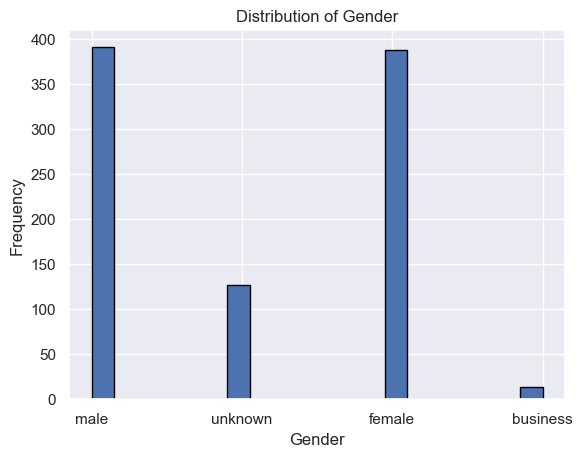

In [6]:
plt.hist(name_gender_df["Gender"], bins = 20, edgecolor = "black")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()

In [7]:

gender = pd.DataFrame([(name, gender) for name, gender in dictionary.items()], columns=['Name', 'Gender'])



In [8]:
gender.tail(1)

,Name,Gender
919,Centro,business


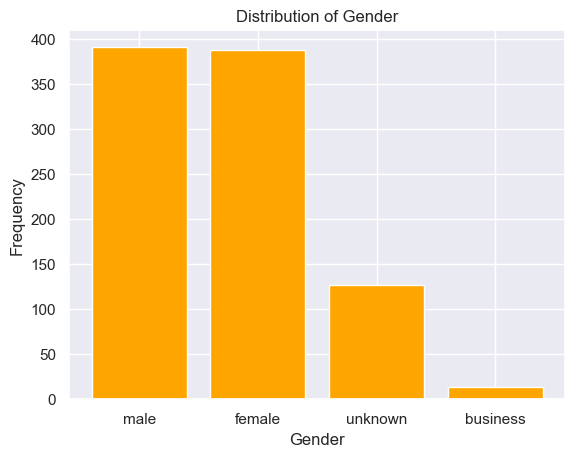

In [9]:
plt.bar(gender["Gender"].value_counts().index, gender["Gender"].value_counts(), 
        color = "orange")

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()

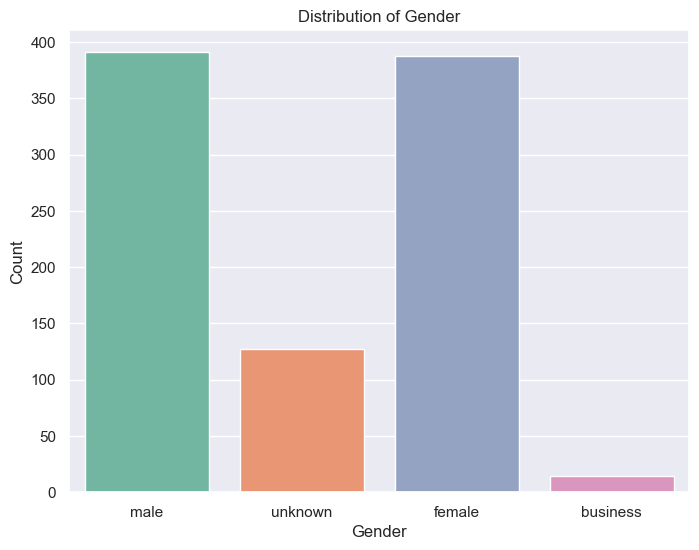

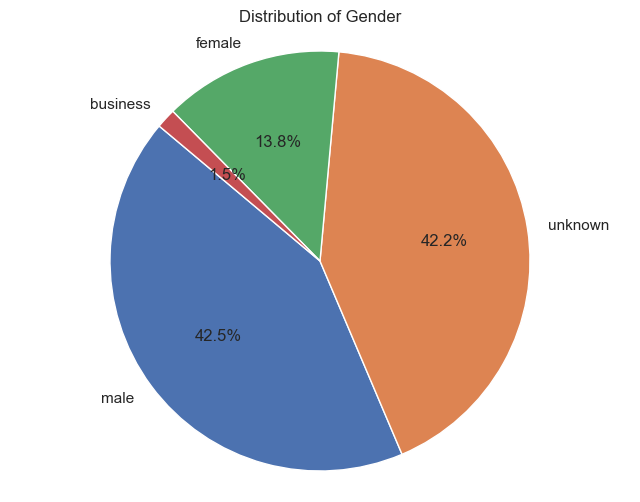

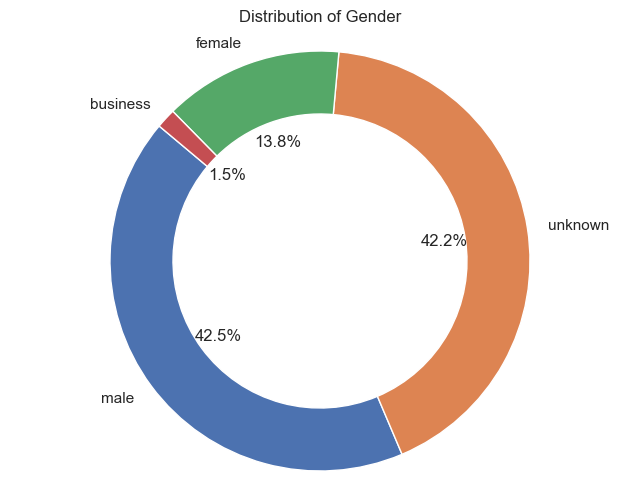

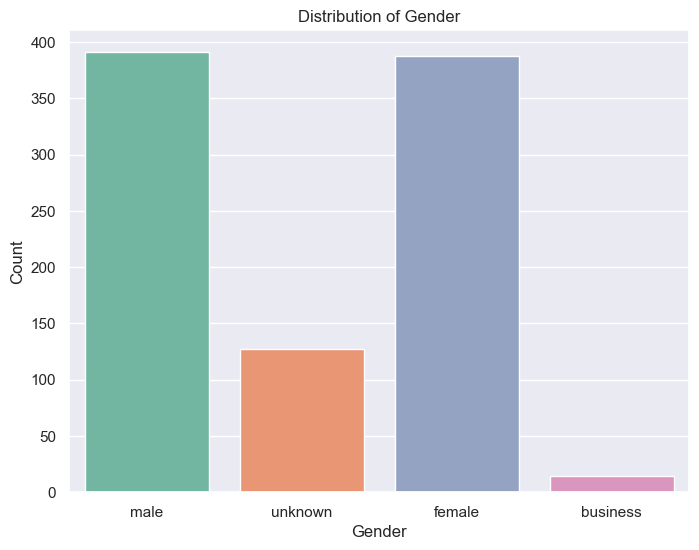

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your DataFrame is called 'df' and has a column named 'Gender'

# 1. Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=gender, x='Gender', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

# 2. Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(gender['Gender'].value_counts(), labels=gender['Gender'].unique(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Gender')
plt.show()

# 3. Donut Chart
plt.figure(figsize=(8, 6))
plt.pie(gender['Gender'].value_counts(), labels=gender['Gender'].unique(), autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Gender')
plt.show()

# 4. Count Plot (from seaborn)
plt.figure(figsize=(8, 6))
sns.countplot(data=gender, x='Gender', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


In [11]:
f = pd.read_csv("file2793.csv")

In [12]:
f['comment'] = f['comment'].astype(str)  

split_df = f['comment'].str.split('(Original)', expand=True, n=1)
f['before_original'] = split_df[0]
f['after_original'] = split_df[1]

In [13]:
def clean_text(text):
    if pd.notna(text):  
       
        text = text.replace('(Translated by Google)', '')

        text = text.replace('\n\n(Original)\n', '')
  
        text = text.replace('\n\n', '')
  
        text = text.replace('(', '')

        text = text.replace('\\', '')

        return text.strip()  
    else:
        return text  

f['cleaned_text'] = f['before_original'].apply(clean_text)

In [14]:
f.dropna(subset = ['cleaned_text'], inplace = True)

f.head(2)

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text
0,Cássio Trajano,FIVE,(Translated by Google) I'm there every beginni...,2019-01-29T16:49:28.556676Z,2019-01-29T16:49:28.556676Z,Cássio Trajano,ChdDSUhNMG9nS0VJQ0FnSURJdjktNTN3RRAB,(Translated by Google) I'm there every beginni...,Original,I'm there every beginning of the year I highly...
1,Danielle cristine faria de oliveira,FIVE,(Translated by Google) Very beautiful and plea...,2019-01-28T14:40:59.180127Z,2019-01-28T14:40:59.180127Z,Danielle cristine faria de oliveira,ChdDSUhNMG9nS0VJQ0FnSURJbjdMczlRRRAB,(Translated by Google) Very beautiful and plea...,Original,Very beautiful and pleasant place. Breakfast a...


In [15]:
f.replace('nan', np.nan, inplace = True)

f.dropna(subset = ['cleaned_text'], inplace = True)

In [16]:
f["Name"] = f["displayName"].str.split().str[0]

f.tail(1)

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text,Name
2792,Marcelo o empreendedor,FIVE,(Translated by Google) The group played paintb...,2018-01-20T15:32:53.260Z,2018-01-20T15:34:48.062Z,Marcelo o empreendedor,ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB,(Translated by Google) The group played paintb...,Original,"The group played paintball, a lot of fun.",Marcelo


In [17]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, 0 to 2792
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   displayName      1648 non-null   object
 1   starRating       1648 non-null   object
 2   comment          1648 non-null   object
 3   createTime       1648 non-null   object
 4   updateTime       1648 non-null   object
 5   reviewer_name    1648 non-null   object
 6   review_id        1648 non-null   object
 7   before_original  1648 non-null   object
 8   after_original   1613 non-null   object
 9   cleaned_text     1648 non-null   object
 10  Name             1648 non-null   object
dtypes: object(11)
memory usage: 154.5+ KB


In [18]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    920 non-null    object
 1   Gender  920 non-null    object
dtypes: object(2)
memory usage: 14.5+ KB


In [19]:
combined_df = pd.merge(f, gender, on='Name', how='inner')

In [20]:
combined_df.tail(1)

,displayName,starRating,comment,createTime,updateTime,reviewer_name,review_id,before_original,after_original,cleaned_text,Name,Gender
1626,Fael Faul,FIVE,(Translated by Google) Too good\n\n(Original)\...,2018-01-21T21:24:40.996Z,2018-01-21T21:24:40.996Z,Fael Faul,ChdDSUhNMG9nS0VJQ0FnSUNRLTU3UjNnRRAB,(Translated by Google) Too good\n\n(,Original,Too good,Fael,male


In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   displayName      1627 non-null   object
 1   starRating       1627 non-null   object
 2   comment          1627 non-null   object
 3   createTime       1627 non-null   object
 4   updateTime       1627 non-null   object
 5   reviewer_name    1627 non-null   object
 6   review_id        1627 non-null   object
 7   before_original  1627 non-null   object
 8   after_original   1595 non-null   object
 9   cleaned_text     1627 non-null   object
 10  Name             1627 non-null   object
 11  Gender           1627 non-null   object
dtypes: object(12)
memory usage: 152.7+ KB


In [22]:
# Convert "Name" columns to sets
names_f = set(f["Name"])
names_gender = set(gender["Name"])

# Find names present in f but not in gender
names_only_in_f = names_f - names_gender

# Find names present in gender but not in f
names_only_in_gender = names_gender - names_f

print("Names only in f dataframe:", names_only_in_f)
print("Names only in gender dataframe:", names_only_in_gender)


Names only in f dataframe: {'gustavao0103', 'EDileuza', 'snebur', 'Vânia', 'Tércia', 'Eladio', 'Fabio', 'francisco', 'Agatha', 'Lara', 'Kauê'}
Names only in gender dataframe: {'gustavao0103francisco'}


'gustavao0103', 'francisco',

'Kauê', 'Fabio',    'Eladio'

 

'Vânia', 'Lara', 'Agatha', 'EDileuza', 'Tércia', 

'snebur',

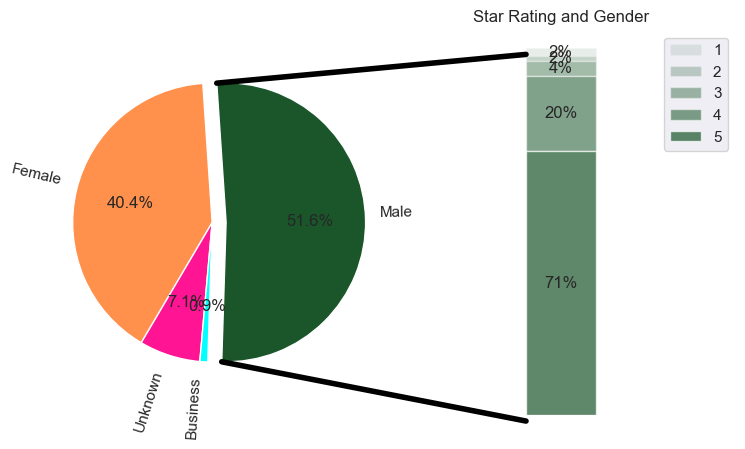

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 5))
fig.subplots_adjust(wspace = 0)

# pie chart parameters
overall_ratios = [0.51, 0.40, 0.07, 0.009]
labels = ["Male", "Female", "Unknown", "Business"]
explode = [0.1, 0, 0, 0]
colors = ["#1a562a",  "#ff914d", "deeppink", "cyan"]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct = '%1.1f%%', startangle = angle,
                     labels = labels, explode = explode, rotatelabels = True,
                    colors = ["#1a562a",  "#ff914d", "deeppink", "cyan"])

        

# bar chart parameters
star_ratios = [0.71, 0.20, 0.04, 0.015, 0.019]
star_labels = ["5", "4", "3", "2", "1"]
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(star_ratios, star_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom = bottom,
                 color = "#1a562a", label = label,
                 alpha = 0.1 + 0.15 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type = "center")
    

ax2.set_title("Star Rating and Gender")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(star_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA = (-width / 2, 0), coordsA = ax2.transData,
                      xyB = (x, y), coordsB = ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

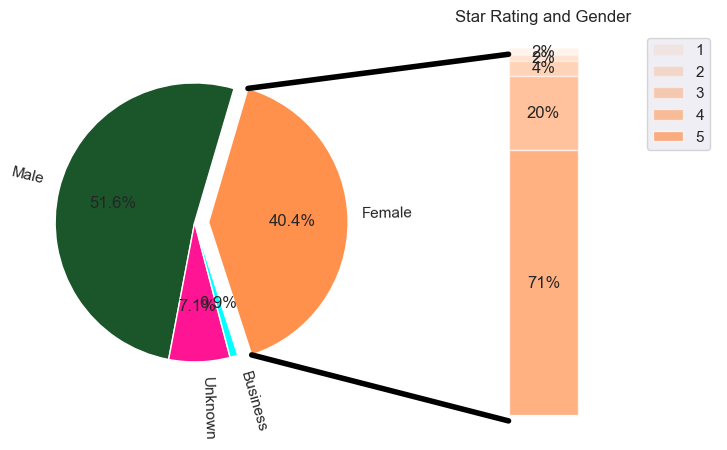

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 5))
fig.subplots_adjust(wspace = 0)

# pie chart parameters
overall_ratios = [0.40, 0.51, 0.07, 0.009]
labels = ["Female", "Male", "Unknown", "Business"]
explode = [0.1, 0, 0, 0]
colors = ["#ff914d", "#1a562a", "deeppink", "cyan"]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct = '%1.1f%%', startangle = angle,
                     labels = labels, explode = explode, rotatelabels = True,
                    colors = colors)

        

# bar chart parameters
star_ratios = [0.71, 0.20, 0.04, 0.015, 0.019]
star_labels = ["5", "4", "3", "2", "1"]
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(star_ratios, star_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom = bottom,
                 color = "#ff914d", label = label,
                 alpha = 0.1 + 0.15 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type = "center")
    

ax2.set_title("Star Rating and Gender")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(star_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA = (-width / 2, 0), coordsA = ax2.transData,
                      xyB = (x, y), coordsB = ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()